## InSAR_Calculation Using Example

**Last Updated**: November 25, 2024

This notebook is an example of using InSAR_Calculation to calculate fault parallel velocity projection with strike N35W (325 degrees) using data from Sentinel-1 track D173 and A166. The data can be obtained from https://doi.org/10.5281/zenodo.10076838 (about 1 Gb for each track).

<hr style="border:1px solid gray"> </hr>

## 1. Imports and setup

In [1]:
import InSAR_Calculation as InCal
# For reading HDF5 files
import cgm_library as cgm
# For create grid 
import xarray as xr
# For create a map
import pygmt   

<hr style="border:1px solid gray"> </hr>

## 2. Calculate fault parallel and vertical velocities

In [2]:
# Read sentinel HDF5 data
D173_structure = cgm.io_cgm_hdf5.read_cgm_hdf5_full_data("D173_COMB_CGM_InSAR_v2.0.0.hdf5")
A166_structure = cgm.io_cgm_hdf5.read_cgm_hdf5_full_data("A166_COMB_CGM_InSAR_v2.0.0.hdf5")

# Calculate fault parallel velocity of Sentinel
sentinel_fp, sentinel_up =  InCal.velocity_projection(D173_structure , A166_structure, azimuth = -35)

Reading file D173_COMB_CGM_InSAR_v2.0.0.hdf5 
Reading track D173: 
Reading file A166_COMB_CGM_InSAR_v2.0.0.hdf5 
Reading track A166: 


<hr style="border:1px solid gray"> </hr>

## 3. Visuallize the results

In [3]:
# Common coordinate for creating grid 
common_lat, common_lon = InCal.common_coordinates(D173_structure, A166_structure)

# Fault Parallel grid
sentinel_fp_grid =  xr.DataArray(sentinel_fp, coords=[common_lat, common_lon],  dims=["lat", "long"])
# Vertical grid
sentinel_up_grid =  xr.DataArray(sentinel_up, coords=[common_lat, common_lon],  dims=["lat", "long"])

# Save results as .grd files for future use
sentinel_fp_grid.to_netcdf('output/sentinel_1_faultparvel.comb_a166_d173.grd')
sentinel_up_grid.to_netcdf('output/sentinel_1_vertvel.comb_a166_d173.grd')

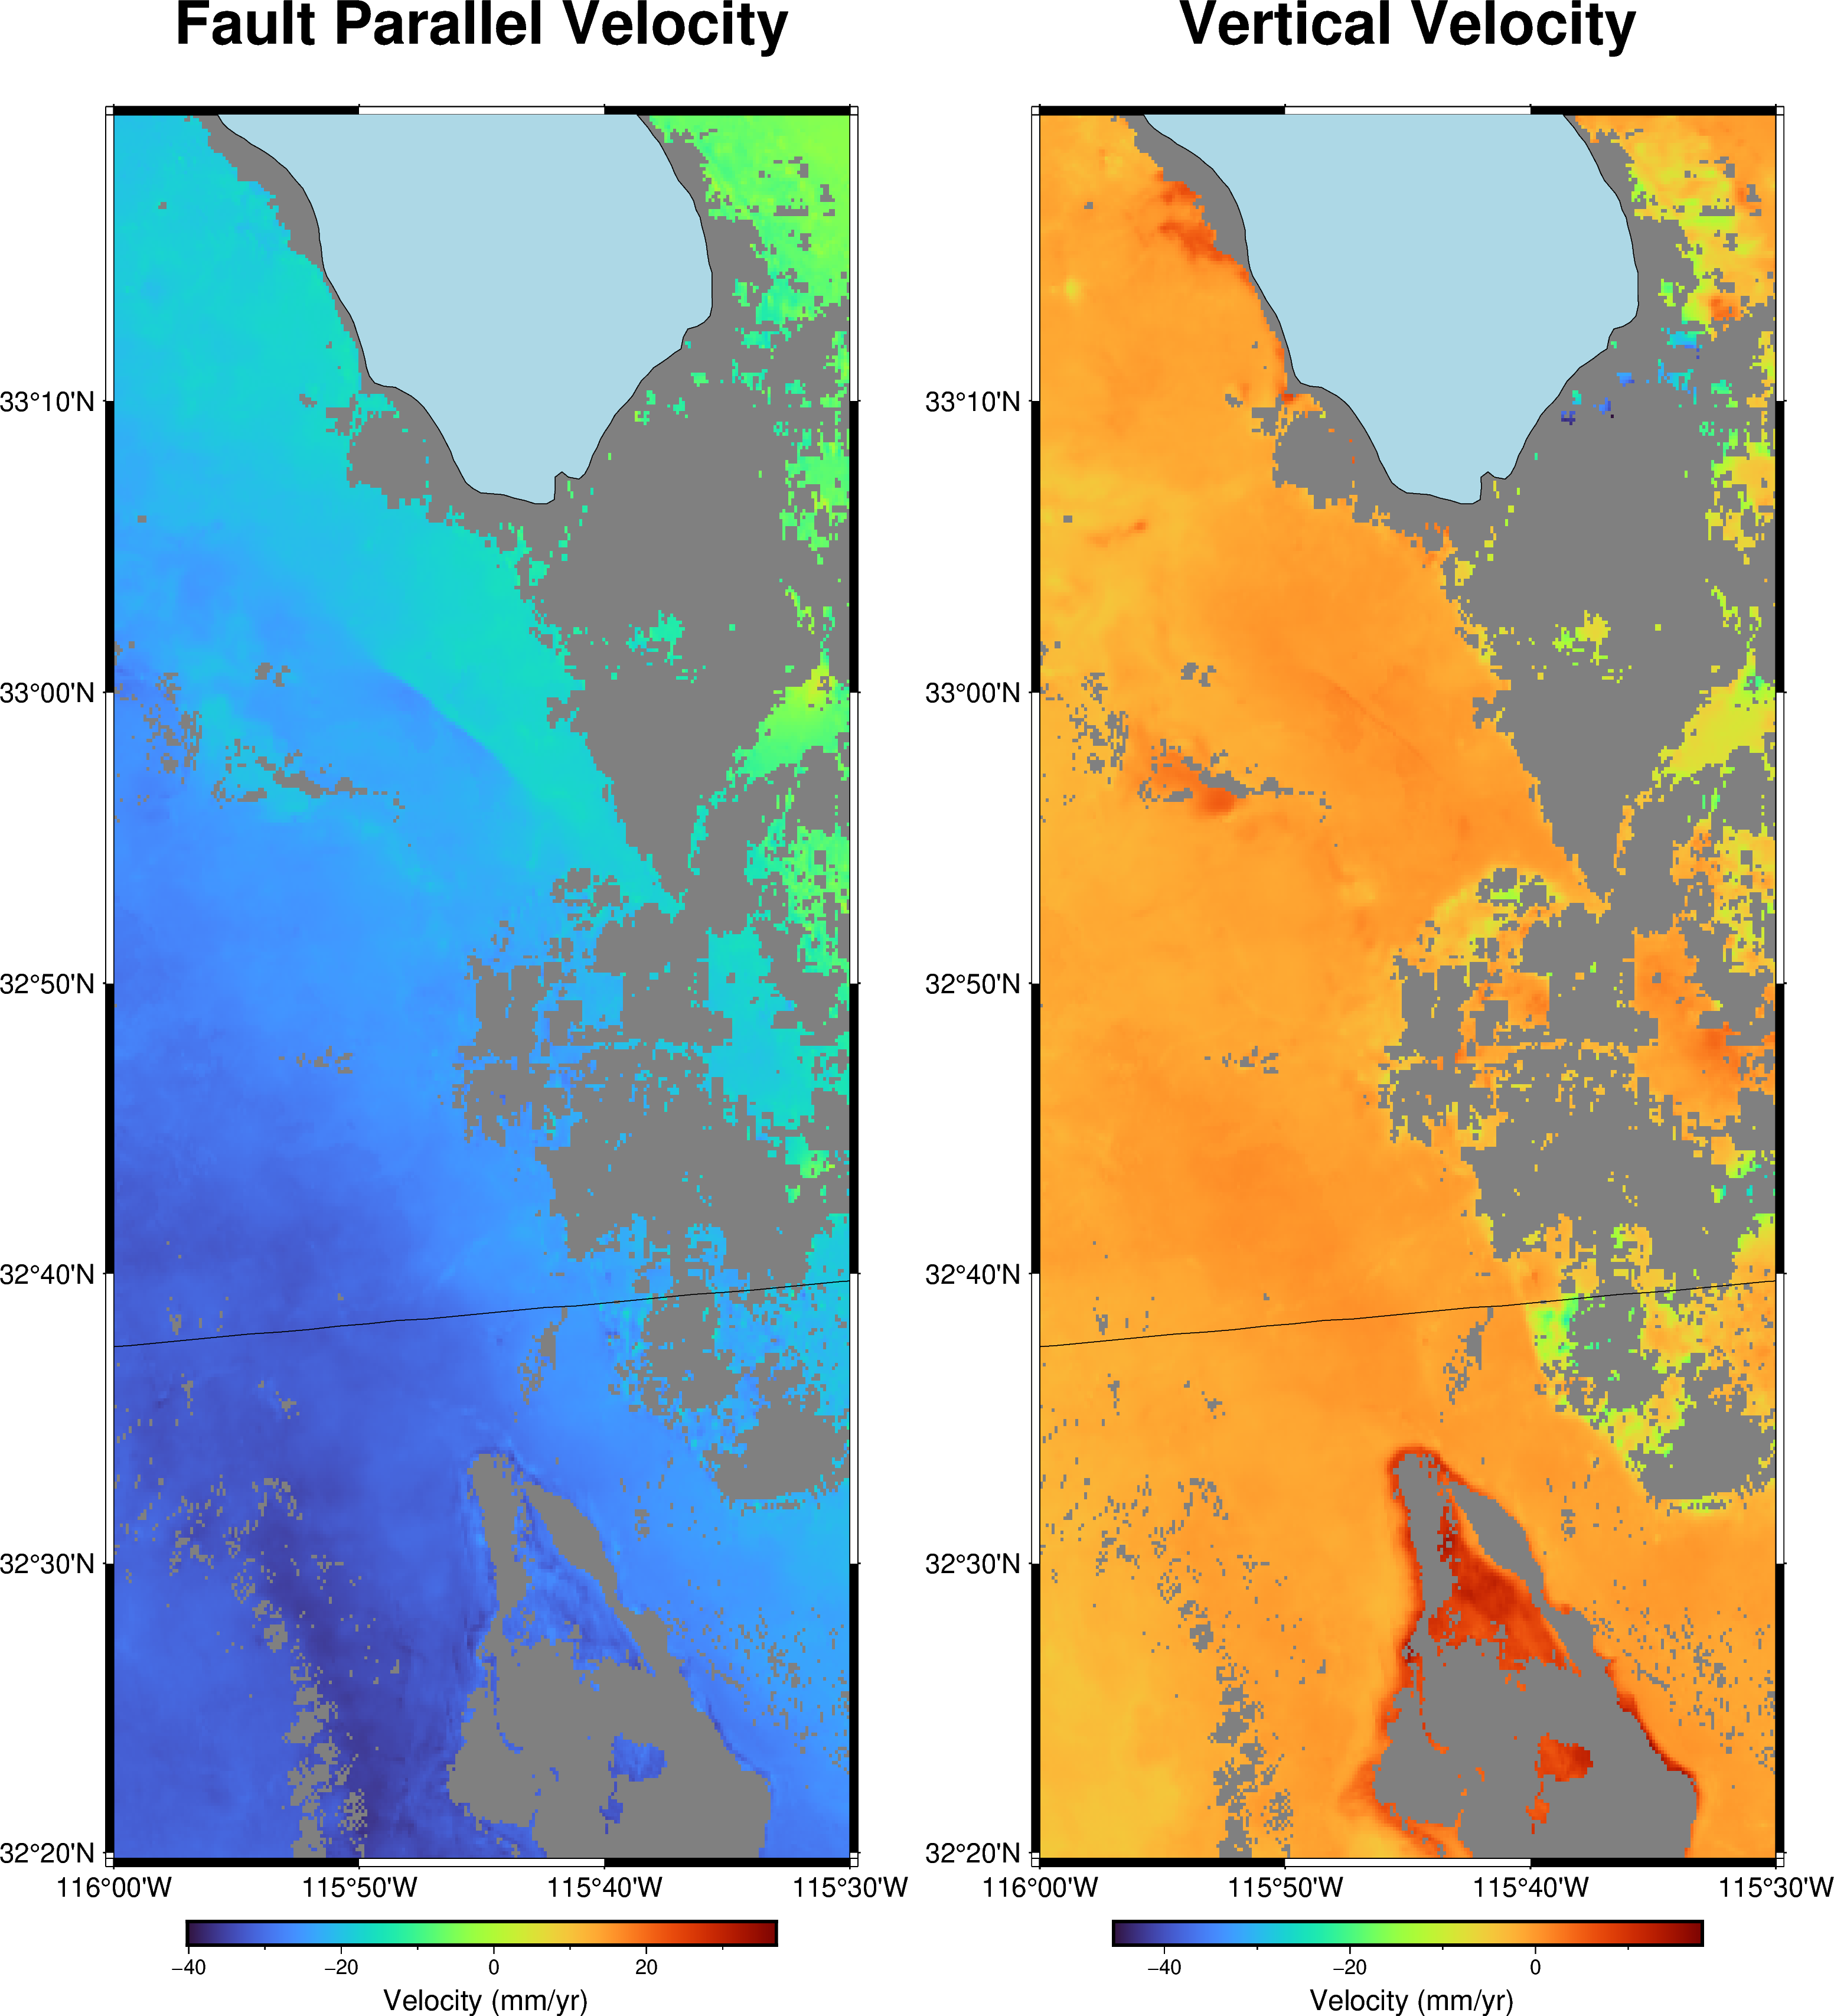

In [4]:
# Create map with PyGMT

region=[-116,-115.5,32.33,33.33]
fig = pygmt.Figure()

with fig.subplot(nrows=1, ncols=2, figsize=("25c", "25c"), autolabel=False, margins="0.5c"):
    with fig.set_panel(panel=0):
        fig.grdimage(grid=sentinel_fp_grid, projection="M?", region= region, frame=['a', '+t Fault Parallel Velocity'], )
        fig.coast(shorelines=True, borders=[1], water="lightblue")
        fig.colorbar(frame = 'af+l Velocity (mm/yr)')

    with fig.set_panel(panel=1):
        fig.grdimage(grid=sentinel_up_grid, projection="M?", region= region, frame= ["a", '+t Vertical Velocity'], )
        fig.coast(shorelines=True, borders=[1], water="lightblue")
        fig.colorbar(frame = 'af+l Velocity (mm/yr)')

fig.show()
fig.savefig('output/sentinel_1_faultpar_vert.png')